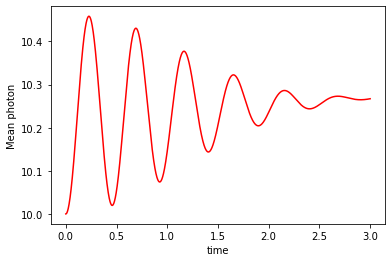

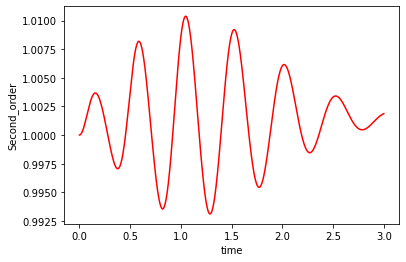

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


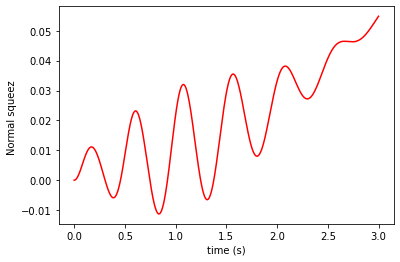

In [1]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

#coherent state 
def CS(N, alpha, offset=0, method='operator'):
    x = basis(N, 0)
    a = destroy(N)
    D = (alpha * a.dag() - conj(alpha) * a).expm()
    return D * x
# The expectation values of the photon number
def Mean_photon(level_n, states):
    a= tensor(destroy(N), qeye(level_n))
    nc = a.dag() * a
    NC1 = expect(nc, states)
    return NC1

def Second_order(level_n, states):
    a= tensor(destroy(N), qeye(level_n))
    ncc= (a.dag()*a)**2
    nc = a.dag() * a
    NC1 = expect(nc, states)
    NCC1 = expect(ncc, states)
    Q=(NCC1-NC1)/NC1**2
    return Q    

def Normal_Sqx(level_n, states):
    a= tensor(destroy(N), qeye(level_n))
    nc = a.dag() * a
    nf = a + a.dag()
    aa = a**2
    ad = a.dag()**2
    aae= expect(aa, states)
    ade= expect(ad, states)
    nfe= expect(nf, states)
    NC1 = expect(nc, states)
    Sx = 0.25*(2* NC1+ aae+ 1+ ade- (nfe)**2)-0.25  
    return Sx

def Normal_Sqy(level_n, states):
    a= tensor(destroy(N), qeye(level_n))
    nc = a.dag() * a
    nf = a - a.dag()
    aa = a**2
    ad = a.dag()**2
    aae= expect(aa, states)
    ade= expect(ad, states)
    nfe= expect(nf, states)
    NC1 = expect(nc, states)
    Sy = (2*NC1- aae- ade +1+ (nfe)**2)*(1/4)-(1/4)    
    return Sy    
# The Hamiltonian of the atom-field system 
# in the presence of classical homogenous gravitational field
def hamiltonian_t(t, args):
    H1 = args[0]
    H2 = args[1]
    H3 = args[2]
    H4 = args[3]
    return (exp(1j*(delta1*t-(kg*t**2)/2))*H1+exp(-1j*(delta1*t-(kg*t**2)/2))*H2)+\
           (exp(1j*(delta2*t-(kg*t**2)/2))*H3+exp(-1j*(delta2*t-(kg*t**2)/2))*H4) 


N = 60
delta1 = 10.0     # first detuning
delta2 = 10.0     # second detuning 
kg = 0.9         # gravity operator 

#field operators
a = tensor(destroy(N), qeye(3))
nc = a.dag() * a
xc = a + a.dag()

# atomic operators
sm = tensor(qeye(N), destroy(3))
s11= tensor(qeye(N), basis(3,0)*basis(3,0).dag())
s22= tensor(qeye(N), basis(3,1)*basis(3,1).dag())
s33= tensor(qeye(N), basis(3,2)*basis(3,2).dag())
s12= tensor(qeye(N), basis(3,0)*basis(3,1).dag())
s13= tensor(qeye(N), basis(3,0)*basis(3,2).dag())
s23= tensor(qeye(N), basis(3,1)*basis(3,2).dag())
nq = sm.dag() * sm
xq = sm + sm.dag()
sz=s11-s22
I = tensor(qeye(N), qeye(3))

# dispersive hamiltonian
H1 = a * s12 
H2 = a.dag()* s12.dag()
H3 = a * s13
H4 = a.dag()* s13.dag()
args = (H1, H2, H3, H4)
# time 
tlist = linspace(0, 3.0, 1500)
# collapse operators, only active if gamma1 > 0
c_ops = []
# atom and the field are initially prepared in the excited and coherent state 
psi0 = tensor(CS(N, sqrt(10)), (basis(3,0)).unit())
res = mesolve(hamiltonian_t, psi0, tlist, c_ops, [], args)

mean=Mean_photon(3, res.states)
sec= Second_order(3, res.states)
Norm=Normal_Sqx(3, res.states)

plt.figure(1)
plt.plot(tlist, mean ,"r-")
plt.xlabel('time')
plt.ylabel('Mean photon')

plt.show()
show()

plt.figure(2)
plt.plot(tlist, sec ,"r-")
plt.xlabel('time')
plt.ylabel('Second_order')

plt.show()
show()

plt.figure(3)
plt.plot(tlist, Norm ,"r-")
plt.xlabel('time (s)')
plt.ylabel('Normal squeez ')

plt.show()
show()